# Here I will try to preidct the genre of a song from the Top Hits Spotify from 2000-2019 datasets
#### Using SVM and Random Forest Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/haitonghuang/Downloads/datasets/songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [3]:
x = df['genre'].str.split(pat=',',expand=True)
x

,0,1,2,3
0,pop,None,None,None
1,rock,pop,None,None
2,pop,country,None,None
3,rock,metal,None,None
4,pop,None,None,None
...,...,...,...,...
1995,pop,None,None,None
1996,pop,None,None,None
1997,hip hop,country,None,None
1998,pop,None,None,None


In [4]:
x = x.rename(columns={x.columns[0]: 'genre_1'})
x = x.rename(columns={x.columns[1]: 'genre_2'})
x.drop(columns = [2,3,'genre_2'])

,genre_1
0,pop
1,rock
2,pop
3,rock
4,pop
...,...
1995,pop
1996,pop
1997,hip hop
1998,pop


In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
x1 = le.fit_transform(x['genre_1'])


In [6]:
x = pd.DataFrame(data = x1 , columns = ['genre_1'])
x

,genre_1
0,9
1,10
2,9
3,10
4,9
...,...
1995,9
1996,9
1997,6
1998,9


In [7]:
df_1 = pd.concat(objs = [x, df], axis = 1, ignore_index = False)
df_1['explicit'] = le.fit_transform(df_1['explicit'])
df_1

,genre_1,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,9,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,10,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,9,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,10,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,9,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,Jonas Brothers,Sucker,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,9,Taylor Swift,Cruel Summer,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,6,Blanco Brown,The Git Up,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,9,Sam Smith,Dancing With A Stranger (with Normani),171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


<AxesSubplot:>

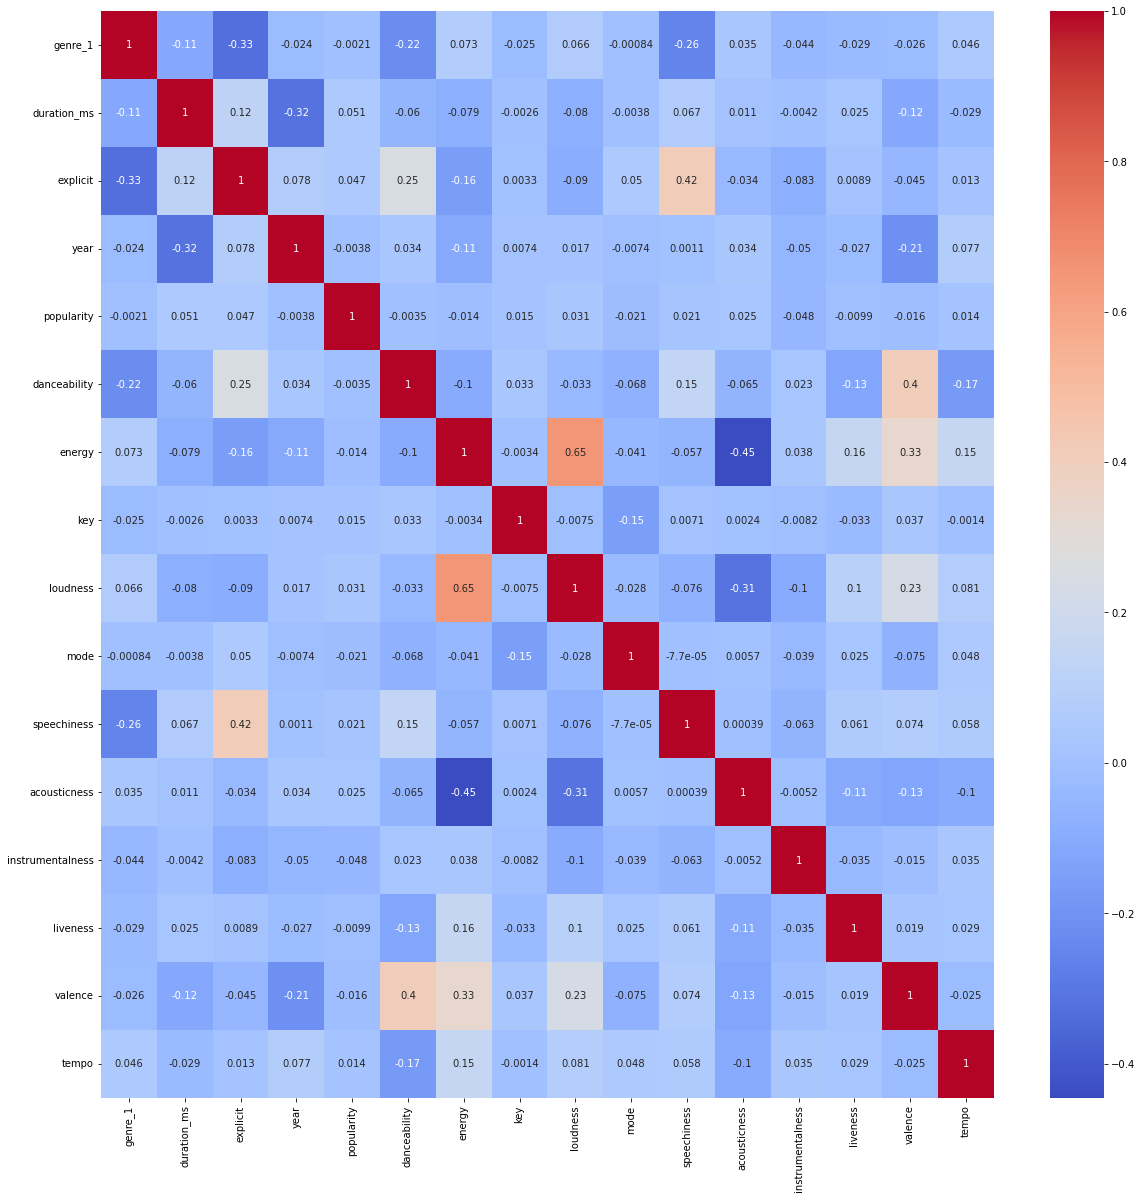

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm')

In [9]:
df_1 = df_1.drop(columns = ['artist','song','genre'])

In [10]:
df_1

,genre_1,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,9,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,10,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,9,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,10,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,9,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,9,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,6,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,9,171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [11]:
x = df_1.drop(columns = 'genre_1')
y = df_1['genre_1']

In [12]:
x

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [13]:
scale = StandardScaler()
x = scale.fit_transform(x)


In [14]:
x = pd.DataFrame(data=x)

x.columns = ['duration_ms','explicit','year','popularity','danceability','energy','key','loudness','mode',
             'speechiness','acousticness','instrumentalness','liveness','valence','tempo']
x

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.449516,-0.616654,-1.620553,0.802968,0.595254,0.744130,-1.211348,0.035403,-1.113392,-0.622748,0.986974,-0.173316,1.235719,1.550256,-0.929867
1,-1.576468,-0.616654,-1.791245,0.896731,-1.662882,1.156685,-1.488038,0.307519,0.898156,-0.569697,-0.684669,-0.173518,3.063158,0.599207,1.060944
2,0.557109,-0.616654,-1.791245,0.287268,-0.986153,-1.469257,0.448791,-1.807847,0.898156,-0.775658,0.254151,-0.173518,0.496211,-1.239486,0.620779
3,-0.108752,-0.616654,-1.620553,0.849850,-0.829437,1.261461,-1.488038,0.749837,-1.113392,-0.592582,-0.592345,-0.173364,1.178834,-0.034825,-0.004843
4,-0.720430,-0.616654,-1.620553,0.240386,-0.380660,1.359688,0.725481,0.365460,-1.113392,-0.540572,-0.508676,-0.161666,-0.687713,1.482324,1.948543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.219679,-0.616654,1.622601,0.896731,1.243488,0.089282,-1.211348,0.231472,-1.113392,-0.465677,-0.497713,-0.173518,-0.534834,1.812926,0.661543
1996,-1.286130,-0.616654,1.622601,0.849850,-0.822314,-0.120269,1.002171,-0.100655,0.898156,0.555806,-0.068983,-0.173283,-0.541944,0.055751,1.849806
1997,-0.719587,-0.616654,1.622601,0.427914,1.279105,-0.277433,1.002171,-1.615400,0.898156,0.056507,-0.358073,-0.173518,0.659756,1.174365,-0.821152
1998,-1.475182,-0.616654,1.622601,0.709204,0.524019,-1.312094,0.725481,-1.034954,0.898156,-0.394943,1.852512,-0.173496,0.290002,-0.926999,-0.635175


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0   0   0   0   2   0   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0  92   0   0  68   0   0]
 [  0   0   0   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   2   0   0   2   0   0]
 [  0   0   0   0   0  20   0   0 164   0   0]
 [  0   0   0   0   0   2   0   0  30   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.77      0.57      0.66       160
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00      

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [17]:
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(x_train, y_train)
y_pred_rbf = svclassifier_rbf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

[[  0   0   0   0   0   1   0   0   8   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0  99   0   0  61   0   0]
 [  0   0   0   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   2   0   0   2   0   0]
 [  0   0   0   0   0  30   0   0 153   1   0]
 [  0   0   0   0   0   3   0   0  25   4   0]
 [  0   0   0   0   0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.73      0.62      0.67       160
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00      

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [18]:
svclassifier_poly = SVC(kernel='poly', degree=2)
svclassifier_poly.fit(x_train, y_train)
y_pred_poly = svclassifier_poly.predict(x_test)
print(confusion_matrix(y_test,y_pred_poly))
print(classification_report(y_test,y_pred_poly))

[[  0   0   0   2   0   1   0   0   6   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0  91   0   0  69   0   0]
 [  0   0   0   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   2   0   0   2   0   0]
 [  1   0   0   1   0  21   0   0 161   0   0]
 [  0   0   0   0   0   2   0   0  28   2   0]
 [  0   0   0   0   0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.76      0.57      0.65       160
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00      

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  0   0   0   0   0   2   0   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0 110   0   0  50   0   0]
 [  0   0   0   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   2   0   0   2   0   0]
 [  0   0   0   0   0  38   0   0 144   2   0]
 [  0   0   0   0   0   2   0   0  23   7   0]
 [  0   0   0   0   0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.71      0.69      0.70       160
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00      

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [22]:
feature_imp = pd.DataFrame({'importance': rfc.feature_importances_}, index = x.columns).sort_values('importance')
feature_imp

,importance
mode,0.012483
key,0.041495
instrumentalness,0.049131
year,0.057915
liveness,0.060597
valence,0.060622
loudness,0.061538
popularity,0.063411
energy,0.064226
tempo,0.071410


In [23]:
a = feature_imp[feature_imp.importance > 0.02].index
a

Index(['key', 'instrumentalness', 'year', 'liveness', 'valence', 'loudness',
       'popularity', 'energy', 'tempo', 'duration_ms', 'acousticness',
       'danceability', 'explicit', 'speechiness'],
      dtype='object')

In [24]:
x1 = x[a]
x1

,key,instrumentalness,year,liveness,valence,loudness,popularity,energy,tempo,duration_ms,acousticness,danceability,explicit,speechiness
0,-1.211348,-0.173316,-1.620553,1.235719,1.550256,0.035403,0.802968,0.744130,-0.929867,-0.449516,0.986974,0.595254,-0.616654,-0.622748
1,-1.488038,-0.173518,-1.791245,3.063158,0.599207,0.307519,0.896731,1.156685,1.060944,-1.576468,-0.684669,-1.662882,-0.616654,-0.569697
2,0.448791,-0.173518,-1.791245,0.496211,-1.239486,-1.807847,0.287268,-1.469257,0.620779,0.557109,0.254151,-0.986153,-0.616654,-0.775658
3,-1.488038,-0.173364,-1.620553,1.178834,-0.034825,0.749837,0.849850,1.261461,-0.004843,-0.108752,-0.592345,-0.829437,-0.616654,-0.592582
4,0.725481,-0.161666,-1.620553,-0.687713,1.482324,0.365460,0.240386,1.359688,1.948543,-0.720430,-0.508676,-0.380660,-0.616654,-0.540572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.211348,-0.173518,1.622601,-0.534834,1.812926,0.231472,0.896731,0.089282,0.661543,-1.219679,-0.497713,1.243488,-0.616654,-0.465677
1996,1.002171,-0.173283,1.622601,-0.541944,0.055751,-0.100655,0.849850,-0.120269,1.849806,-1.286130,-0.068983,-0.822314,-0.616654,0.555806
1997,1.002171,-0.173518,1.622601,0.659756,1.174365,-1.615400,0.427914,-0.277433,-0.821152,-0.719587,-0.358073,1.279105,-0.616654,0.056507
1998,0.725481,-0.173496,1.622601,0.290002,-0.926999,-1.034954,0.709204,-1.312094,-0.635175,-1.475182,1.852512,0.524019,-0.616654,-0.394943


In [25]:
x_train2, x_test2,y_train2, y_test2 = train_test_split(x1, y, test_size=0.2,random_state=100)

In [26]:
svclassifier_rbf2 = SVC(kernel='rbf')
svclassifier_rbf2.fit(x_train2, y_train2)
y_pred_rbf2 = svclassifier_rbf2.predict(x_test2)
print(confusion_matrix(y_test2,y_pred_rbf2))
print(classification_report(y_test2,y_pred_rbf2))

[[  0   0   0   0   0   1   0   0   8   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0  96   0   0  64   0   0]
 [  0   0   0   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   2   0   0   2   0   0]
 [  0   0   0   0   0  31   0   0 152   1   0]
 [  0   0   0   0   0   2   0   0  25   5   0]
 [  0   0   0   0   0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.72      0.60      0.65       160
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00      

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [27]:
rfc2 = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rfc2.fit(x_train2, y_train2)
rfc_pred2 = rfc2.predict(x_test2)
print(confusion_matrix(y_test2,rfc_pred2))
print(classification_report(y_test2,rfc_pred2))

[[  0   0   0   0   0   2   0   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0 105   0   0  55   0   0]
 [  0   0   0   0   0   1   0   0   2   0   0]
 [  0   0   0   0   0   1   0   0   3   0   0]
 [  0   0   0   0   0  34   0   0 147   3   0]
 [  0   0   0   0   0   2   0   0  21   9   0]
 [  0   0   0   0   0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.72      0.66      0.69       160
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00      

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)